<a href="https://colab.research.google.com/github/Nagaumesh/Codsoft/blob/main/Exploratory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Github link: https://github.com/Nagaumesh/Codsoft/blob/main/Exploratory_DA.ipynb

In [ ]:
# 21BDS0081----------------------K.NAGAUMESH
import pandas as pd

# Load the Dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv'
data = pd.read_csv(url)

# Explore Dimensions and Summary
print(data.info())  # Summary of the dataset
print(data.describe())  # Statistical summary


(27820, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27

In [ ]:
# Check for Missing Values
print(data.isnull().sum())

# Data Cleaning (Fill or Drop NA values as necessary)
data = data.dropna()  # Example of dropping NA


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


In [ ]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


# Module 1: Introduction to EDA


Basic Data Exploration:
    country  year     sex          age  suicides_no  population  \
72  Albania  1995    male  25-34 years           13      232900   
73  Albania  1995    male  55-74 years            9      178000   
74  Albania  1995  female    75+ years            2       40800   
75  Albania  1995  female  15-24 years           13      283500   
76  Albania  1995    male  15-24 years           11      241200   

    suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
72               5.58  Albania1995         0.619      2,424,499,009   
73               5.06  Albania1995         0.619      2,424,499,009   
74               4.90  Albania1995         0.619      2,424,499,009   
75               4.59  Albania1995         0.619      2,424,499,009   
76               4.56  Albania1995         0.619      2,424,499,009   

    gdp_per_capita ($)       generation  
72                 835     Generation X  
73                 835           Silent  
74                 

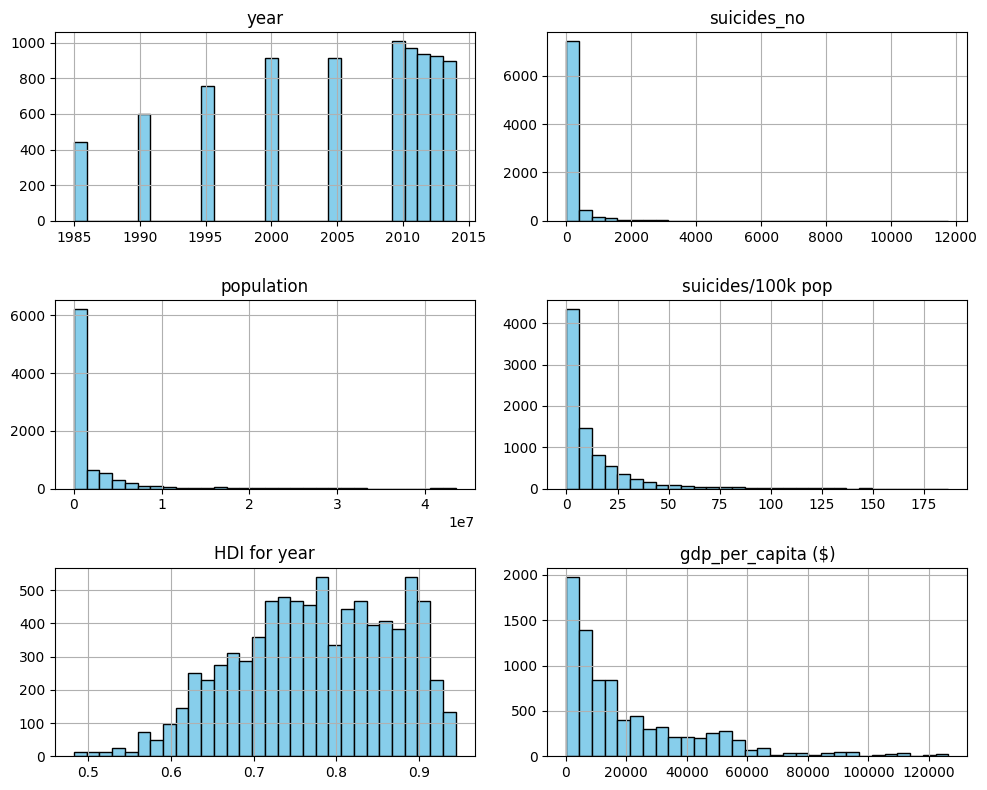


Boxplot for Suicides No:


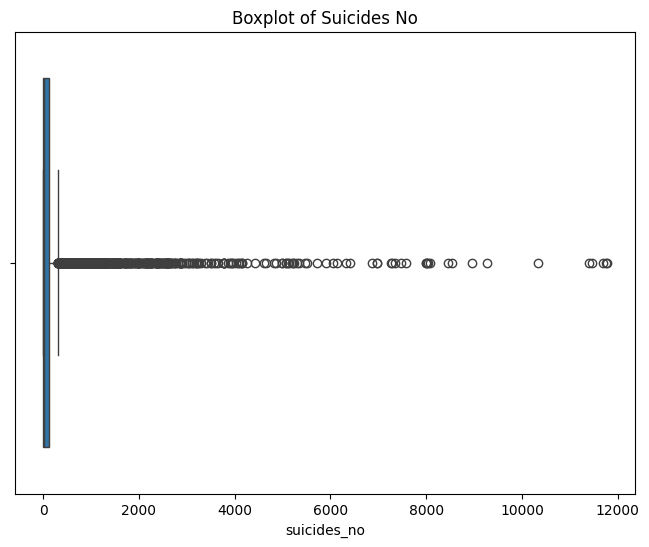


Correlation Heatmap:


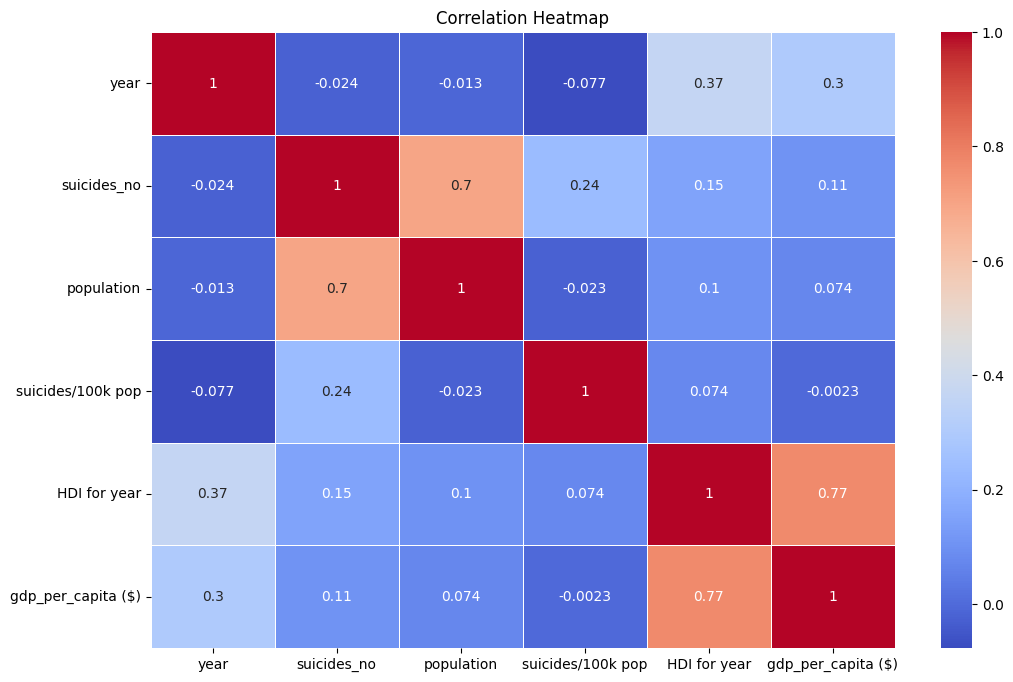


Bar Plot for 'Generation' Column:


<ipython-input-8-62cfb64d415a>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='generation', data=data_imputed, palette='viridis')


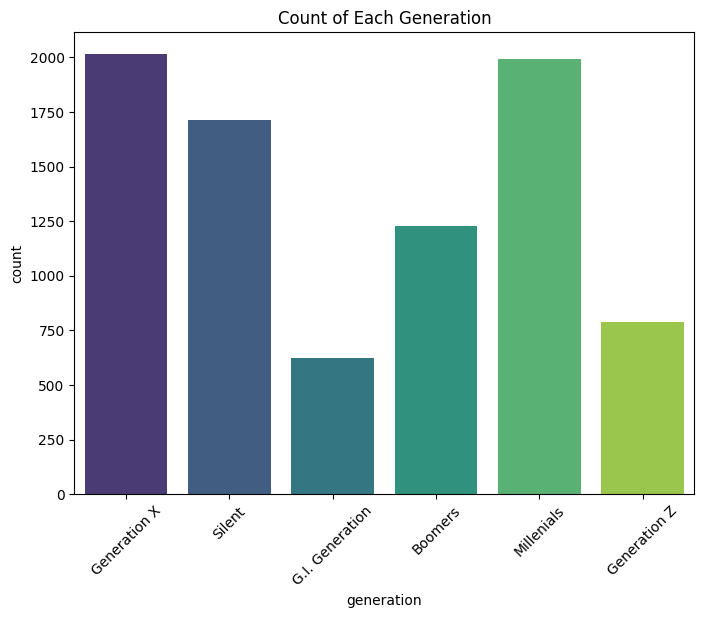


Pie Chart for 'Generation' Column Distribution:


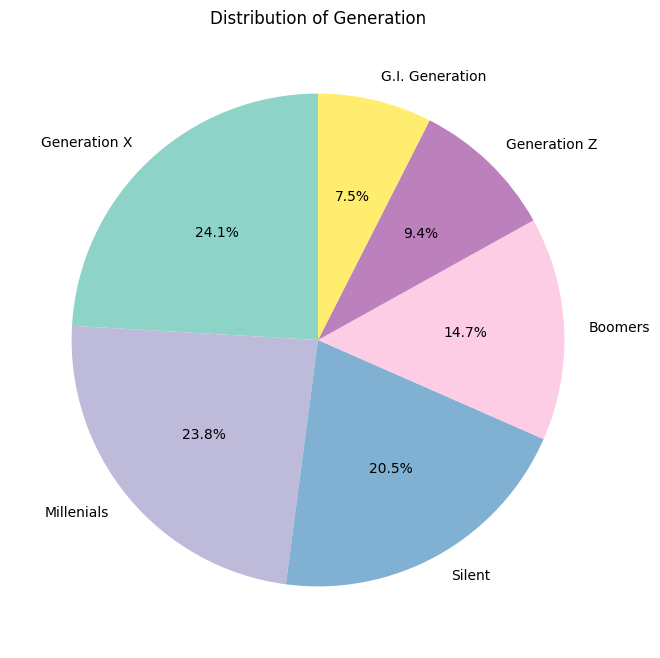

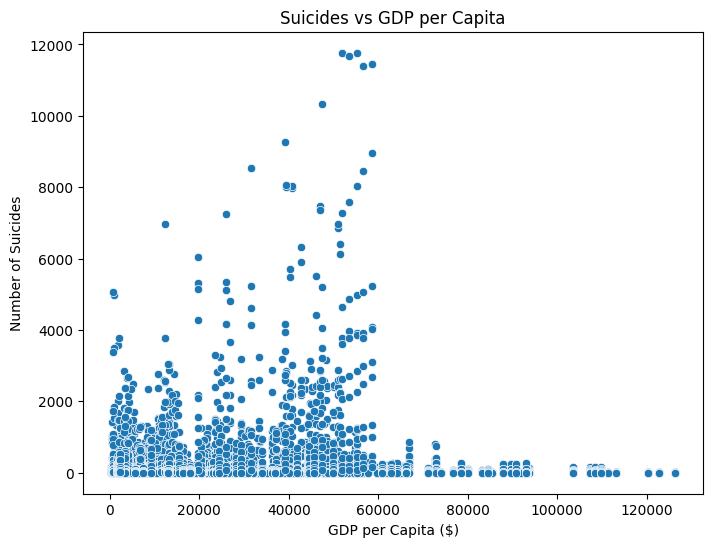

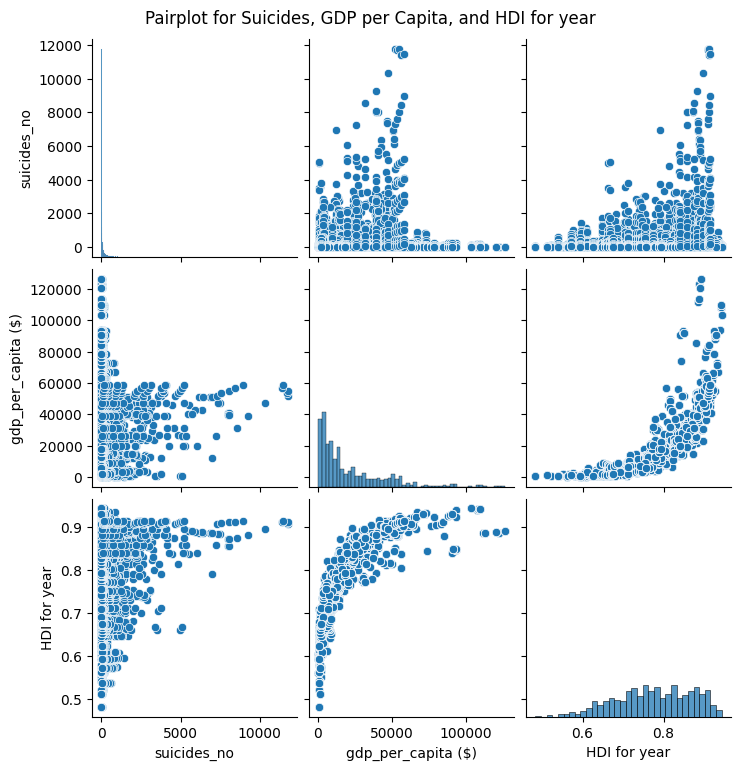

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. **Data Loading and Basic Exploration**
print("\nBasic Data Exploration:")
# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset (data types, non-null counts)
print("\nData Information:")
print(data.info())

# Display basic summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# 2. **Handling Missing Data**
print("\nHandling Missing Data:")
# Impute missing values with the mean for numerical columns
from sklearn.impute import SimpleImputer

numerical_data = data.select_dtypes(include=['float64', 'int64'])
imputer = SimpleImputer(strategy='mean')
data_imputed = data.copy()
data_imputed[numerical_data.columns] = imputer.fit_transform(numerical_data)

# Checking if missing values are handled
print("\nMissing Values After Imputation:")
print(data_imputed.isnull().sum())

# 3. **Basic Visualizations**

# Histogram for numerical columns
print("\nVisualizing Distribution of Numerical Columns:")
numerical_columns = numerical_data.columns
data_imputed[numerical_columns].hist(bins=30, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplot to visualize outliers for a specific numerical column (e.g., 'suicides_no')
print("\nBoxplot for Suicides No:")
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_imputed['suicides_no'])
plt.title('Boxplot of Suicides No')
plt.show()

# Correlation heatmap to understand relationships between numerical variables
print("\nCorrelation Heatmap:")
correlation_matrix = data_imputed[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 4. **Categorical Data Visualization**

# Bar plot for a categorical column (e.g., 'generation')
print("\nBar Plot for 'Generation' Column:")
plt.figure(figsize=(8, 6))
sns.countplot(x='generation', data=data_imputed, palette='viridis')
plt.title('Count of Each Generation')
plt.xticks(rotation=45)
plt.show()

# Pie chart for categorical column distribution
print("\nPie Chart for 'Generation' Column Distribution:")
generation_counts = data_imputed['generation'].value_counts()
plt.figure(figsize=(8, 8))
generation_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Generation')
plt.ylabel('')
plt.show()

# Scatter plot for GDP per Capita
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['gdp_per_capita ($)'], y=data['suicides_no'])
plt.title('Suicides vs GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Number of Suicides')
plt.show()

# Pairplot for multiple columns
sns.pairplot(data[['suicides_no', 'gdp_per_capita ($)', 'HDI for year']])
plt.suptitle('Pairplot for Suicides, GDP per Capita, and HDI for year', y=1.02)
plt.show()


# Module 2

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# 1. Data Deduplication - Remove duplicate rows
print("Initial Row Count:", data.shape[0])
data = data.drop_duplicates()
print("Row Count after Deduplication:", data.shape[0])

# 2. Value Replacement - Replace specific values in 'generation' column
print("\nUnique values in 'generation' before replacement:")
print(data['generation'].unique())
data['generation'] = data['generation'].replace({'Generation X': 'Gen X', 'Silent': 'Silent Gen'})
print("\nUnique values in 'generation' after replacement:")
print(data['generation'].unique())

# 3. Convert 'age' column to numeric, forcing errors to NaN
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Discretization and Binning - Bin 'age' column into age groups
age_bins = [0, 14, 24, 34, 54, 74, np.inf]
age_labels = ['0-14', '15-24', '25-34', '35-54', '55-74', '75+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
print("\nAge group distribution:")
print(data['age_group'].value_counts())

# 4. Missing Data Handling
# Identify missing values
print("\nMissing Values per Column before handling:")
print(data.isnull().sum())

# Handling missing values with Traditional Methods
# Example: Fill 'HDI for year' column with its column mean
if 'HDI for year' in data.columns:
    data['HDI for year'] = data['HDI for year'].fillna(data['HDI for year'].mean())
    print("\nMissing Values in 'HDI for year' after filling with mean:")
    print(data['HDI for year'].isnull().sum())

# Advanced Missing Data Handling: Maximum Likelihood Estimation (MLE) approximation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Selecting numeric columns, excluding those with only NaN values
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
non_empty_numerical_cols = [col for col in numerical_cols if data[col].notna().any()]
numerical_data = data[non_empty_numerical_cols]

# Impute missing values in selected numeric columns
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(numerical_data)

# Convert imputed array back to DataFrame and assign columns, then update original data
imputed_data_df = pd.DataFrame(imputed_data, columns=non_empty_numerical_cols)
data.update(imputed_data_df)

print("\nMissing Values per Column after MLE-based imputation:")
print(data.isnull().sum())


Initial Row Count: 27820
Row Count after Deduplication: 27820

Unique values in 'generation' before replacement:
['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']

Unique values in 'generation' after replacement:
['Gen X' 'Silent Gen' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']

Age group distribution:
age_group
0-14     0
15-24    0
25-34    0
35-54    0
55-74    0
75+      0
Name: count, dtype: int64

Missing Values per Column before handling:
country                   0
year                      0
sex                       0
age                   27820
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
age_group             27820
dtype: int64

Missing Values in 'HDI for year' after filling with mean:
0

Missing Values per Column after MLE-based imputation:
country   

# Module 3: Correlation Analysis and Time Series Analysis

Univariate Analysis:


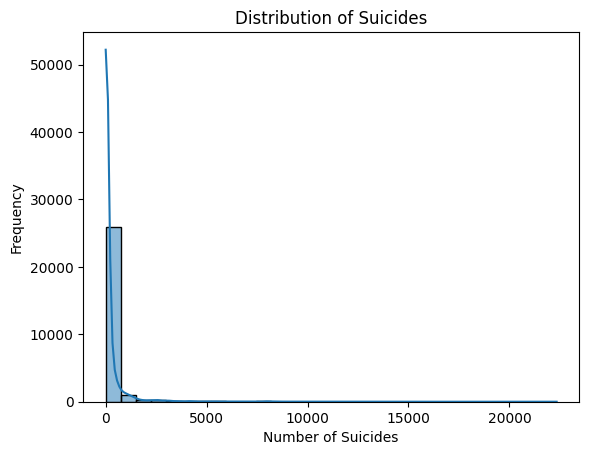

Bivariate Analysis:


<Figure size 640x480 with 0 Axes>

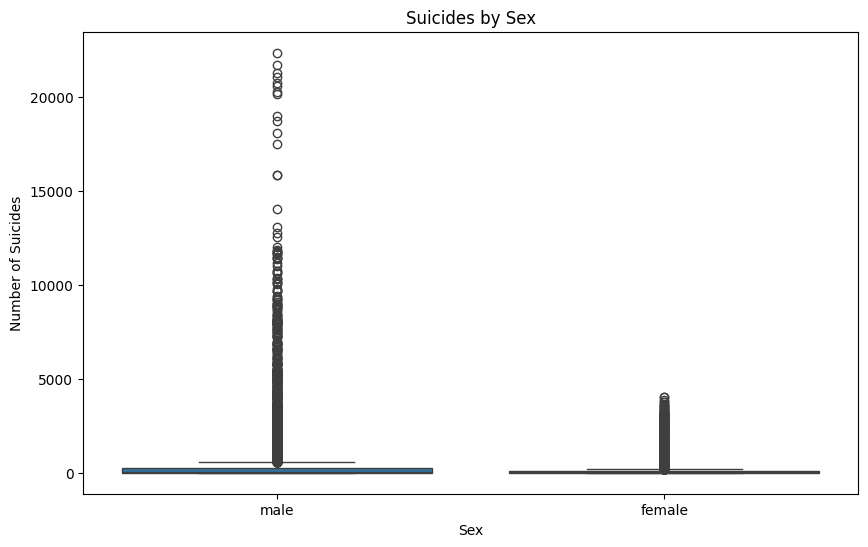

Multivariate Analysis (Correlation Heatmap):


<Figure size 640x480 with 0 Axes>

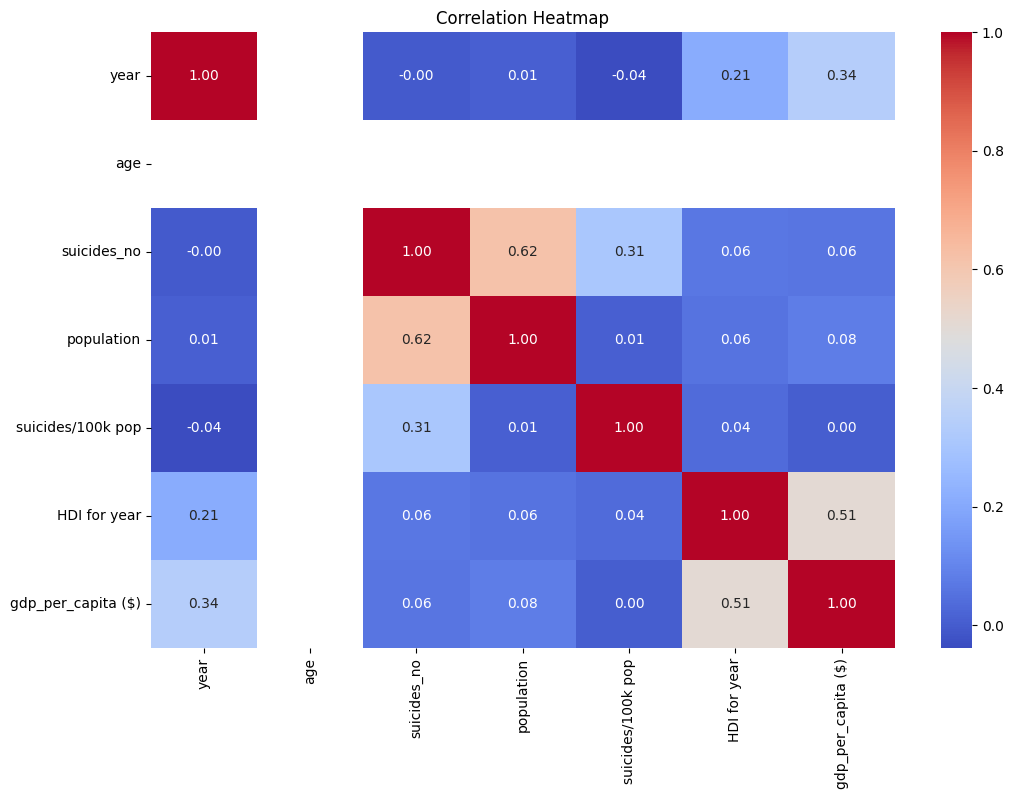

Time Series Analysis (Total Suicides Over Years):


<Figure size 640x480 with 0 Axes>

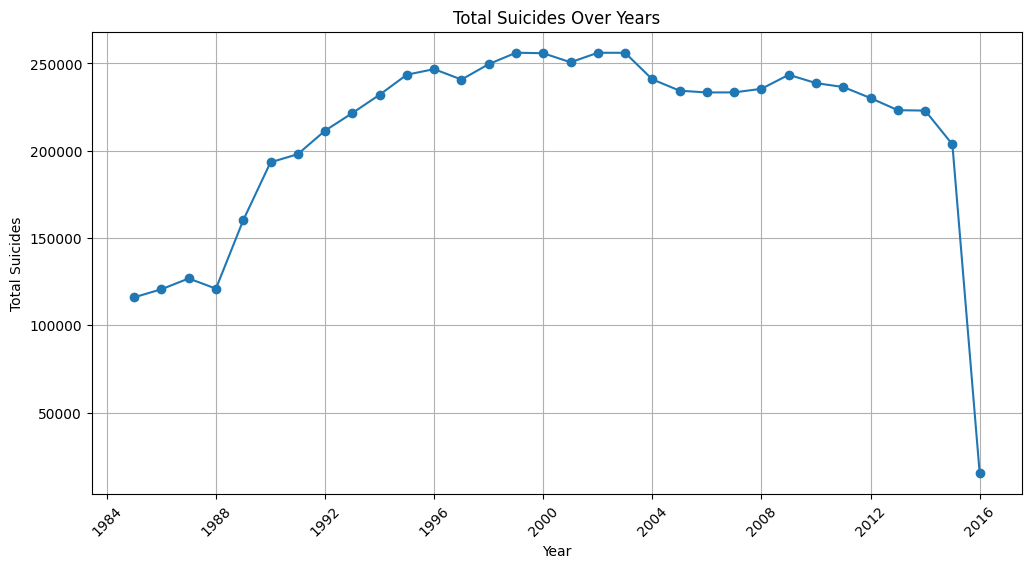

Seasonal Decomposition:


<Figure size 640x480 with 0 Axes>

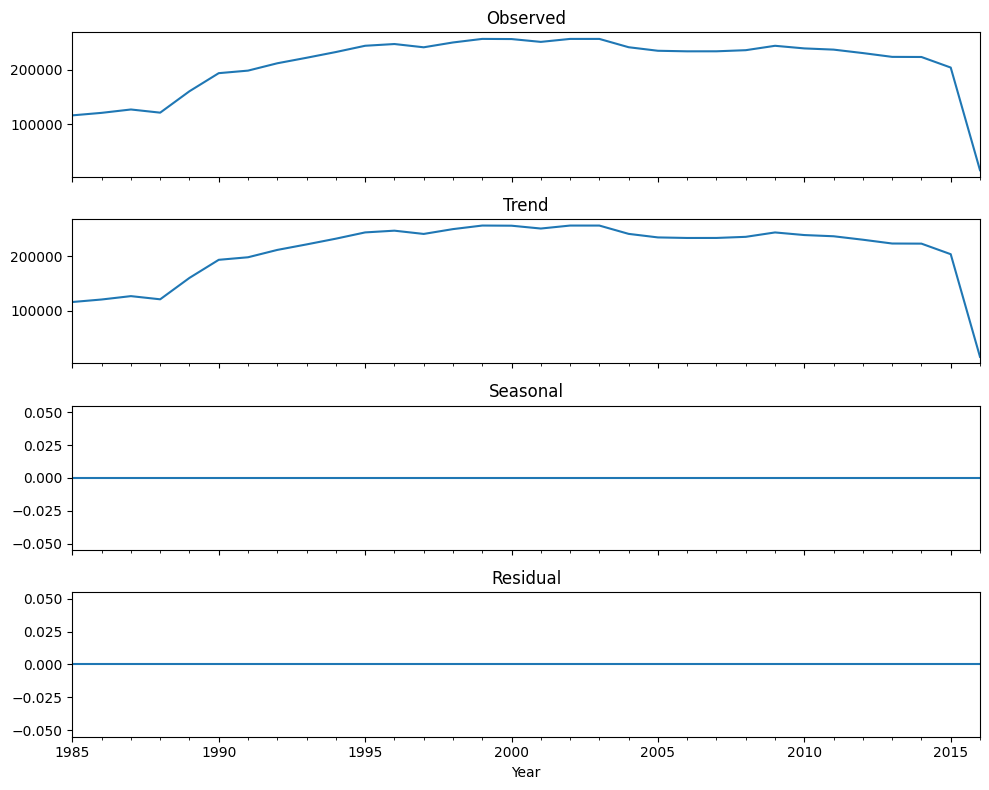

Autocorrelation and Partial Autocorrelation:


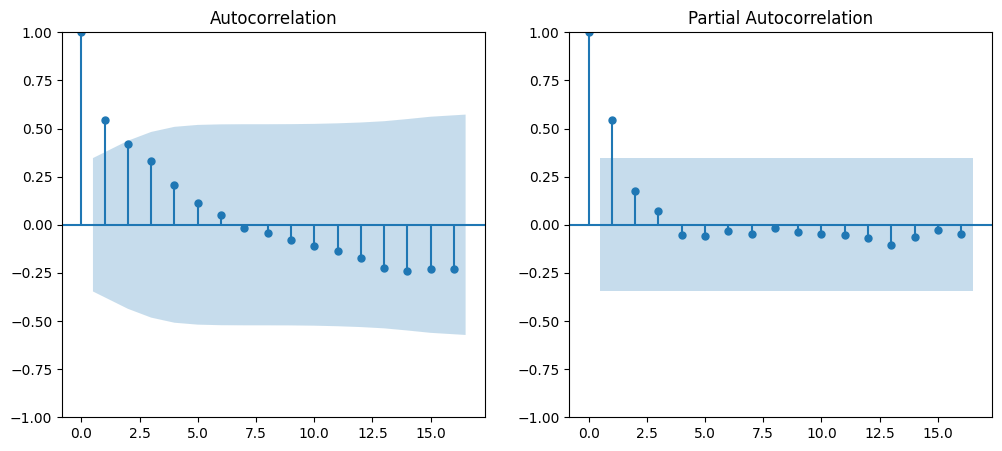

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# 1. Univariate Analysis
print("Univariate Analysis:")
sns.histplot(data['suicides_no'], bins=30, kde=True)
plt.title('Distribution of Suicides')
plt.xlabel('Number of Suicides')
plt.ylabel('Frequency')
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the first graph

# 2. Bivariate Analysis
print("Bivariate Analysis:")
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='suicides_no', data=data)
plt.title('Suicides by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Suicides')
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the second graph

# 3. Multivariate Analysis: Correlation Heatmap
print("Multivariate Analysis (Correlation Heatmap):")
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the heatmap

# 4. Time Series Analysis
# Convert 'year' to datetime if not already converted
data['year'] = pd.to_datetime(data['year'], format='%Y', errors='coerce')

# Group by year and calculate total suicides
time_series_data = data.groupby(data['year'].dt.year)['suicides_no'].sum().reset_index()
time_series_data['year'] = pd.to_datetime(time_series_data['year'], format='%Y')
time_series_data.set_index('year', inplace=True)

# Visualizing Time Series
print("Time Series Analysis (Total Suicides Over Years):")
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['suicides_no'], marker='o')
plt.title('Total Suicides Over Years')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the time series plot

# Time Series Decomposition
print("Seasonal Decomposition:")
decomposition = seasonal_decompose(time_series_data['suicides_no'], model='additive', period=1)

# Plot seasonal decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation
print("Autocorrelation and Partial Autocorrelation:")
fig, (ax_acf, ax_pacf) = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(time_series_data['suicides_no'].dropna(), ax=ax_acf, title="Autocorrelation")
plot_pacf(time_series_data['suicides_no'].dropna(), ax=ax_pacf, title="Partial Autocorrelation")
plt.show()


# Module 4: Data Summarization and Visualization

Statistical Summary Measures:
                                year   suicides_no    population  \
count                          27820  27820.000000  2.782000e+04   
mean   2001-04-05 00:04:45.722501888    242.574407  1.844794e+06   
min              1985-01-01 00:00:00      0.000000  2.780000e+02   
25%              1995-01-01 00:00:00      3.000000  9.749850e+04   
50%              2002-01-01 00:00:00     25.000000  4.301500e+05   
75%              2008-01-01 00:00:00    131.000000  1.486143e+06   
max              2016-01-01 00:00:00  22338.000000  4.380521e+07   
std                              NaN    902.047917  3.911779e+06   

       suicides/100k pop  HDI for year  gdp_per_capita ($)  
count       27820.000000   8364.000000        27820.000000  
mean           12.816097      0.776601        16866.464414  
min             0.000000      0.483000          251.000000  
25%             0.920000      0.713000         3447.000000  
50%             5.990000      0.779000         9372.

<Figure size 640x480 with 0 Axes>

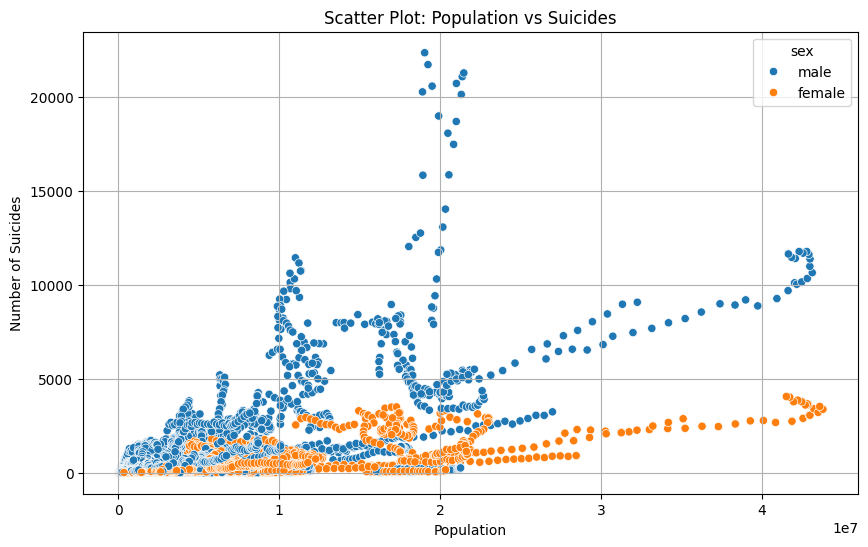

<Figure size 640x480 with 0 Axes>

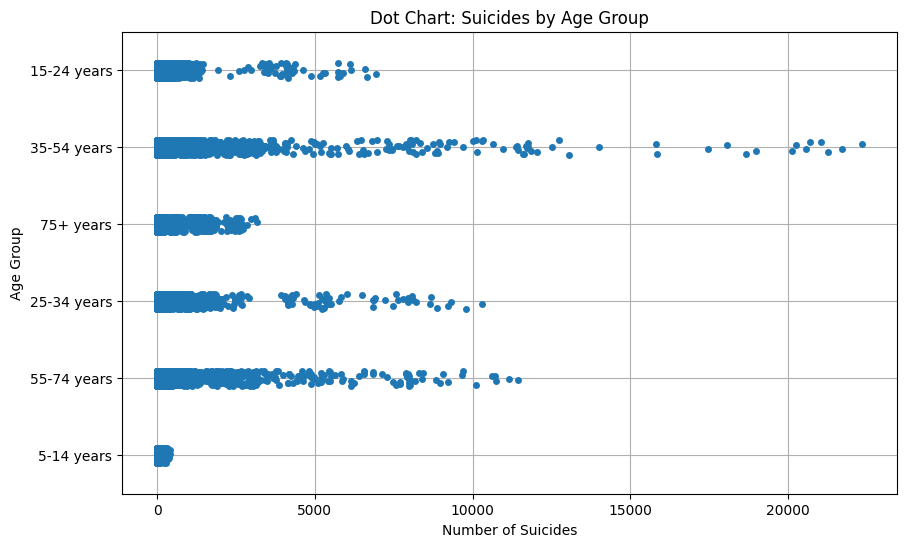

<Figure size 640x480 with 0 Axes>

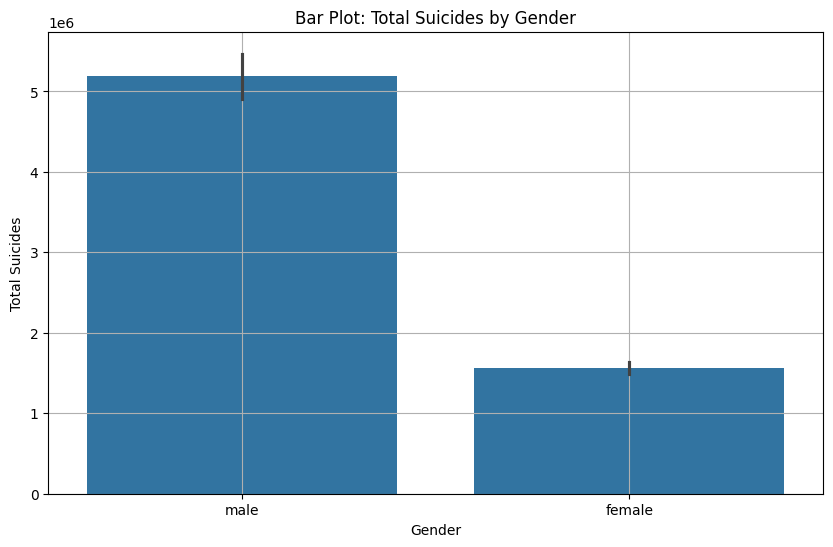

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
# Statistical Summary Measures
print("Statistical Summary Measures:")
print(data.describe())
plt.subplots_adjust(hspace=2)  # Add space after the summary

# 1-D Statistical Data Analysis (e.g., Frequency Distribution)
print("\nFrequency Distribution of Suicides:")
print(data['suicides_no'].value_counts())
plt.subplots_adjust(hspace=2)  # Add space after the frequency distribution

# 2-D Statistical Data Analysis (e.g., Grouping by Gender and Age Group)
print("\n2-D Statistical Analysis (Group by Gender and Age Group):")
grouped_data = data.groupby(['sex', 'age']).agg({'suicides_no': 'sum'}).reset_index()
print(grouped_data)
plt.subplots_adjust(hspace=2)  # Add space after the grouped data

# Contingency Table
contingency_table = pd.crosstab(data['sex'], data['age'])
print("\nContingency Table (Sex vs Age):")
print(contingency_table)

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='suicides_no', hue='sex', data=data)
plt.title('Scatter Plot: Population vs Suicides')
plt.xlabel('Population')
plt.ylabel('Number of Suicides')
plt.grid()
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the scatter plot

# Dot Chart
plt.figure(figsize=(10, 6))
sns.stripplot(x='suicides_no', y='age', data=data, jitter=True)
plt.title('Dot Chart: Suicides by Age Group')
plt.xlabel('Number of Suicides')
plt.ylabel('Age Group')
plt.grid()
plt.show()
plt.subplots_adjust(hspace=2)  # Add space after the dot chart

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='suicides_no', data=data, estimator=sum)
plt.title('Bar Plot: Total Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Suicides')
plt.grid()
plt.show()

# MODULE-5

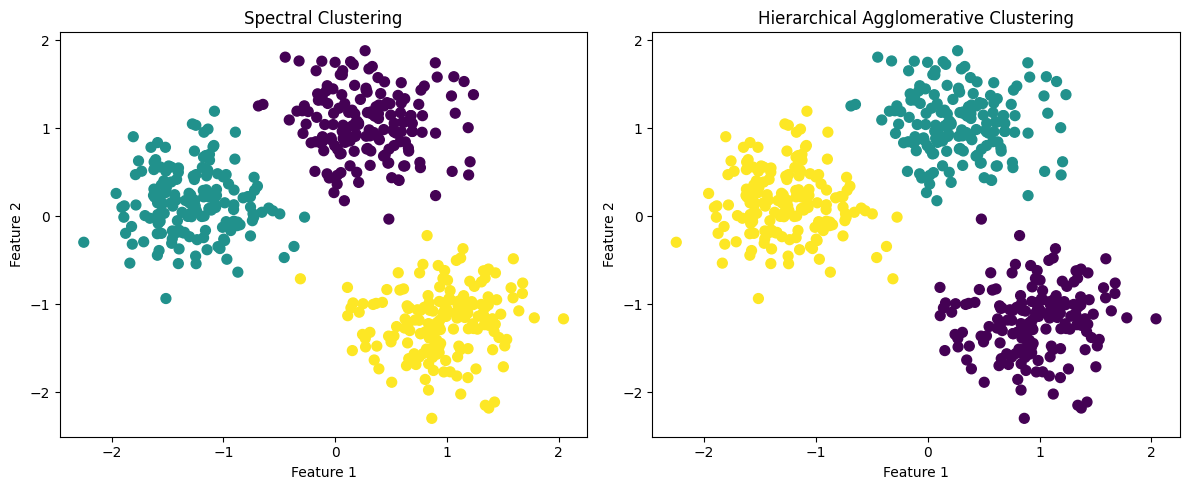

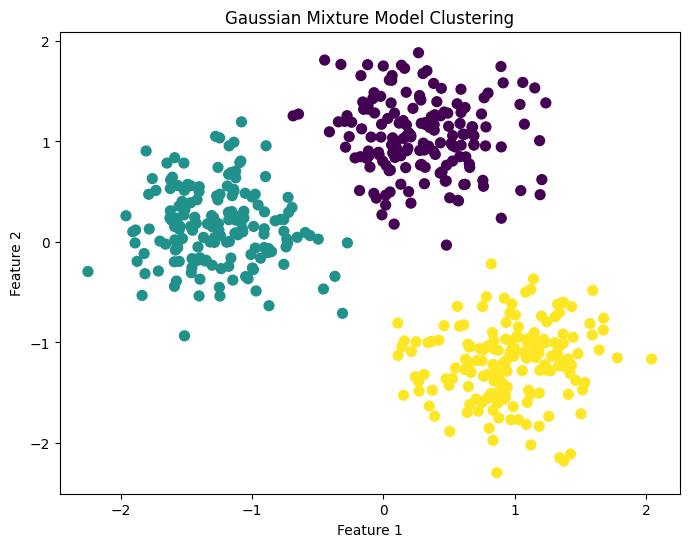

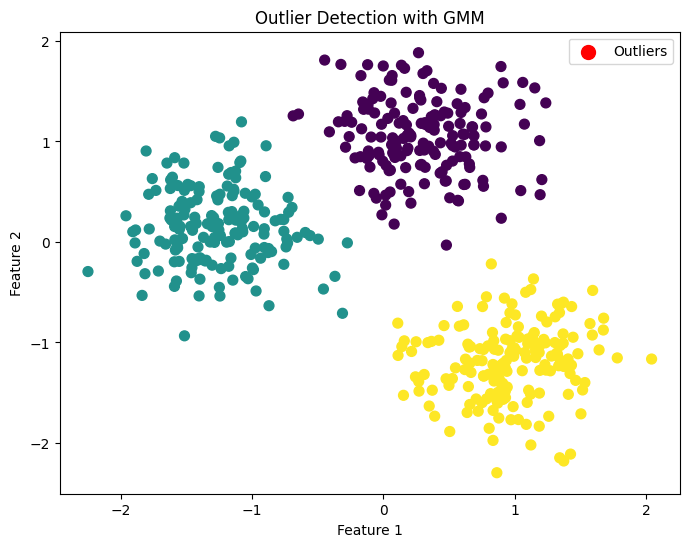

In [ ]:

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Create Sample Data
n_samples = 500
X, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.60, random_state=0)

# Standardizing the Data
X = StandardScaler().fit_transform(X)

# 1. Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0)
labels_spectral = spectral_clustering.fit_predict(X)

# Plotting Spectral Clustering Results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_spectral, cmap='viridis', s=50)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# 2. Hierarchical Agglomerative Clustering
agglo_clustering = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo_clustering.fit_predict(X)

# Plotting Hierarchical Agglomerative Clustering Results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_agglo, cmap='viridis', s=50)
plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# 3. Expectation-Maximization (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels_gmm = gmm.predict(X)

# Plotting GMM Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Outlier Detection (using GMM)
outlier_threshold = 0.1  # Define threshold for outlier detection
probs = gmm.predict_proba(X)
outliers = X[np.max(probs, axis=1) < outlier_threshold]

# Plotting Outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', s=100, label='Outliers')
plt.title('Outlier Detection with GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#Module 6


Principal Component Analysis (PCA):


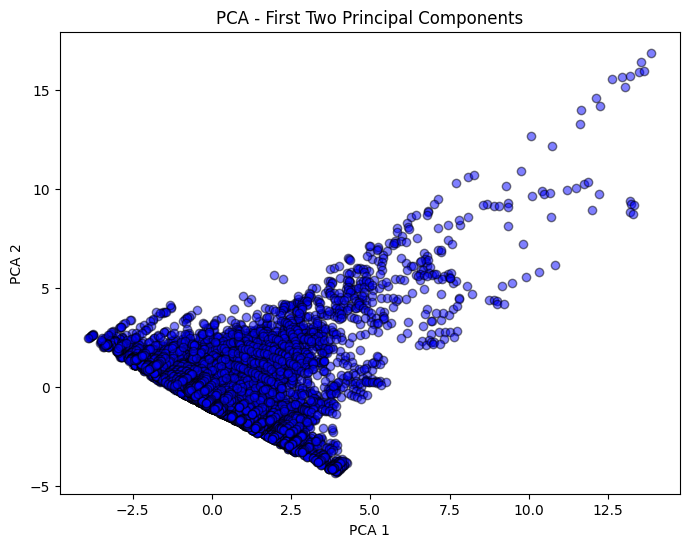


Singular Value Decomposition (SVD):


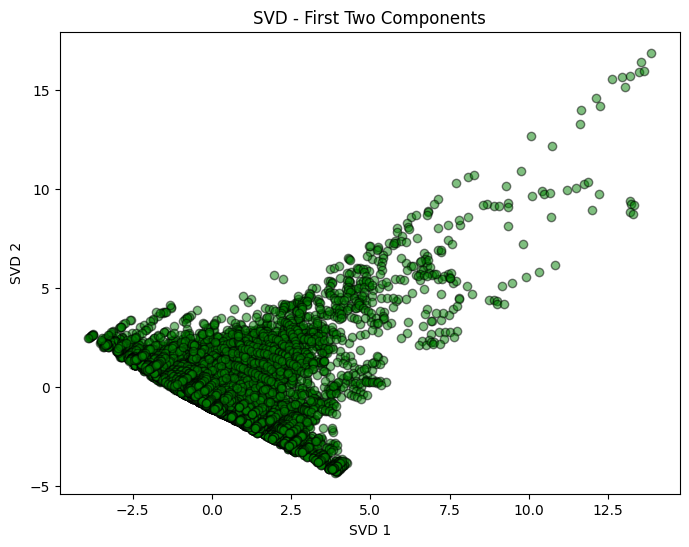


Factor Analysis:


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_factor_analysis.py:299: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn(


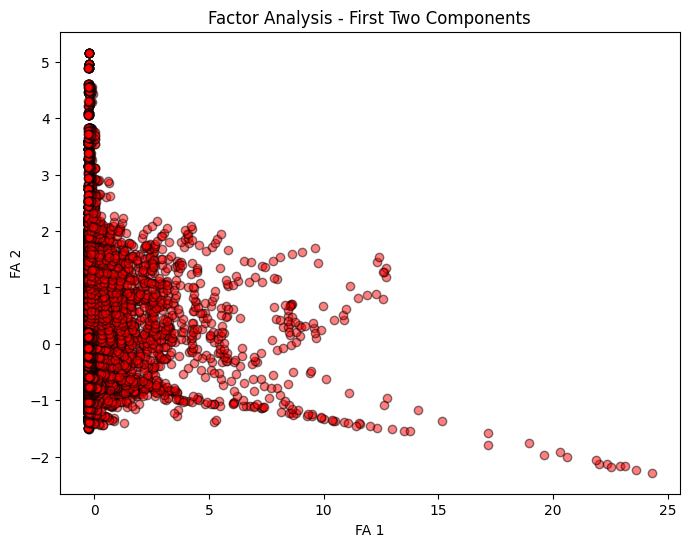

In [ ]:

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis

# URL for the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv'
data = pd.read_csv(url)

# Handling missing values in numerical data by using SimpleImputer
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)

# Standardizing the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data_imputed)

# 1. **Principal Component Analysis (PCA)**
print("\nPrincipal Component Analysis (PCA):")
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Add PCA components to the dataset
data['PCA_1'] = pca_result[:, 0]
data['PCA_2'] = pca_result[:, 1]

# Plotting the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(data['PCA_1'], data['PCA_2'], c='blue', edgecolor='k', alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 2. **Singular Value Decomposition (SVD)**
print("\nSingular Value Decomposition (SVD):")
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(scaled_data)

# Add SVD components to the dataset
data['SVD_1'] = svd_result[:, 0]
data['SVD_2'] = svd_result[:, 1]

# Plotting the first two SVD components
plt.figure(figsize=(8, 6))
plt.scatter(data['SVD_1'], data['SVD_2'], c='green', edgecolor='k', alpha=0.5)
plt.title('SVD - First Two Components')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
plt.show()

# 3. **Factor Analysis**
print("\nFactor Analysis:")
fa = FactorAnalysis(n_components=2)
fa_result = fa.fit_transform(scaled_data)

# Add Factor Analysis components to the dataset
data['FA_1'] = fa_result[:, 0]
data['FA_2'] = fa_result[:, 1]

# Plotting the first two factor analysis components
plt.figure(figsize=(8, 6))
plt.scatter(data['FA_1'], data['FA_2'], c='red', edgecolor='k', alpha=0.5)
plt.title('Factor Analysis - First Two Components')
plt.xlabel('FA 1')
plt.ylabel('FA 2')
plt.show()


# **MODULE-7**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from GitHub
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv'
data = pd.read_csv(url)

# Step 1: Encode the target variable 'sex'
data['sex'] = data['sex'].map({'male': 1, 'female': 0})

# Step 2: One-hot encode categorical features
data = pd.get_dummies(data, drop_first=True)

# Step 3: Handle missing values by filling only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Step 4: Define features (X) and target (y)
X = data.drop('sex', axis=1)
y = data['sex']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.7244787922358016
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      2858
           1       0.75      0.65      0.70      2706

    accuracy                           0.72      5564
   macro avg       0.73      0.72      0.72      5564
weighted avg       0.73      0.72      0.72      5564

